# Mueller Calculus Documentation

** Scott Prahl**


In [1]:
# Execute this cell first
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pypolar.mueller as mueller
import pypolar.jones as jones

np.set_printoptions(suppress=True)

# To solve "No module named 'pypolar.mueller'", run on the command-line (or Anaconda prompt)
#      pip install --upgrade pypolar

# Basic Polarization Fields

In [2]:
light = mueller.stokes_horizontal()
print("Stokes vector for horizontally-polarized light")
print(light)

light = mueller.stokes_linear(0)
print("Stokes vector for 0° linearly polarized light")
print(light)

light = mueller.stokes_vertical()
print("Stokes vector for vertically-polarized light")
print(light)

light = mueller.stokes_linear(np.pi/2)
print("Stokes vector for 90° linearly polarized light")
print(light)

light = mueller.stokes_linear(np.radians(45))
print("Stokes vector for 45° linearly polarized light")
print(light)

light = mueller.stokes_right_circular()
print("Stokes vector for right circularly polarized light")
print(light)

light = mueller.stokes_left_circular()
print("Stokes vector for left circularly polarized light")
print(light)

Stokes vector for horizontally-polarized light
[1 1 0 0]
Stokes vector for 0° linearly polarized light
[1. 1. 0. 0.]
Stokes vector for vertically-polarized light
[ 1 -1  0  0]
Stokes vector for 90° linearly polarized light
[ 1. -1.  0.  0.]
Stokes vector for 45° linearly polarized light
[1. 0. 1. 0.]
Stokes vector for right circularly polarized light
[1 0 0 1]
Stokes vector for left circularly polarized light
[ 1  0  0 -1]


# Linear Polarizers

In [3]:
for theta in np.radians([0,45,90,-45]):
    print('Mueller matrix for perfect linear polarizer at angle theta=',theta/np.pi*180)
    L = mueller.op_linear_polarizer(theta)
    print(L, "\n")

Mueller matrix for perfect linear polarizer at angle theta= 0.0
[[0.5 0.5 0.  0. ]
 [0.5 0.5 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]] 

Mueller matrix for perfect linear polarizer at angle theta= 45.0
[[0.5 0.  0.5 0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.5 0. ]
 [0.  0.  0.  0. ]] 

Mueller matrix for perfect linear polarizer at angle theta= 90.0
[[ 0.5 -0.5  0.   0. ]
 [-0.5  0.5 -0.   0. ]
 [ 0.  -0.   0.   0. ]
 [ 0.   0.   0.   0. ]] 

Mueller matrix for perfect linear polarizer at angle theta= -45.0
[[ 0.5  0.  -0.5  0. ]
 [ 0.   0.  -0.   0. ]
 [-0.5 -0.   0.5  0. ]
 [ 0.   0.   0.   0. ]] 



# Quarter-Wave Plates

In [4]:
for theta in np.radians([0, 90, 45, -45]):
    print('Mueller matrix for quarter-wave plate with fast axis at angle theta=',theta/np.pi*180)
    L = mueller.op_quarter_wave_plate(theta)
    print(L,"\nShould be the same as")
    L = mueller.op_retarder(theta, np.pi/2)
    print(L,"\n")

Mueller matrix for quarter-wave plate with fast axis at angle theta= 0.0
[[ 1.  0.  0.  0.]
 [ 0.  1.  0. -0.]
 [ 0.  0.  0.  1.]
 [ 0.  0. -1.  0.]] 
Should be the same as
[[ 1.  0.  0.  0.]
 [ 0.  1.  0. -0.]
 [ 0.  0.  0.  1.]
 [ 0.  0. -1.  0.]] 

Mueller matrix for quarter-wave plate with fast axis at angle theta= 90.0
[[ 1.  0.  0.  0.]
 [ 0.  1. -0. -0.]
 [ 0. -0.  0. -1.]
 [ 0.  0.  1.  0.]] 
Should be the same as
[[ 1.  0.  0.  0.]
 [ 0.  1. -0. -0.]
 [ 0. -0.  0. -1.]
 [ 0.  0.  1.  0.]] 

Mueller matrix for quarter-wave plate with fast axis at angle theta= 45.0
[[ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]
 [ 0.  1. -0.  0.]] 
Should be the same as
[[ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]
 [ 0.  1. -0.  0.]] 

Mueller matrix for quarter-wave plate with fast axis at angle theta= -45.0
[[ 1.  0.  0.  0.]
 [ 0.  0. -0.  1.]
 [ 0. -0.  1.  0.]
 [ 0. -1. -0.  0.]] 
Should be the same as
[[ 1.  0.  0.  0.]
 [ 0.  0. -0.  1.]
 [ 0. -0.  1.  0.]
 [ 0. -1. 

# Half-Wave Plates

In [5]:
for theta in np.radians([0, 90, 45, -45]):
    print('Mueller matrix for half-wave plate with fast axis at angle theta=',theta/np.pi*180)
    L = mueller.op_half_wave_plate(theta)
    print(L,"\nShould be the same as")
    L = mueller.op_retarder(theta, np.pi)
    print(L,"\n")


Mueller matrix for half-wave plate with fast axis at angle theta= 0.0
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]] 
Should be the same as
[[ 1.  0.  0.  0.]
 [ 0.  1.  0. -0.]
 [ 0.  0. -1.  0.]
 [ 0.  0. -0. -1.]] 

Mueller matrix for half-wave plate with fast axis at angle theta= 90.0
[[ 1.  0.  0.  0.]
 [ 0.  1. -0.  0.]
 [ 0. -0. -1.  0.]
 [ 0.  0.  0. -1.]] 
Should be the same as
[[ 1.  0.  0.  0.]
 [ 0.  1. -0. -0.]
 [ 0. -0. -1. -0.]
 [ 0.  0.  0. -1.]] 

Mueller matrix for half-wave plate with fast axis at angle theta= 45.0
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]] 
Should be the same as
[[ 1.  0.  0.  0.]
 [ 0. -1.  0. -0.]
 [ 0.  0.  1.  0.]
 [ 0.  0. -0. -1.]] 

Mueller matrix for half-wave plate with fast axis at angle theta= -45.0
[[ 1.  0.  0.  0.]
 [ 0. -1. -0.  0.]
 [ 0. -0.  1.  0.]
 [ 0.  0.  0. -1.]] 
Should be the same as
[[ 1.  0.  0.  0.]
 [ 0. -1. -0.  0.]
 [ 0. -0.  1.  0.]
 [ 0. -0. -0. -1.]] 



In [6]:
J = np.array([1+3j,2-2j])
print(max(np.abs(J)))

3.1622776601683795


# Stokes to Jones Conversion


In [7]:
S = mueller.stokes_horizontal()
print("Stokes vector for horizontally-polarized light")
print(S)
J = mueller.stokes_to_jones(S)
print("Jones conversion")
print(J)
print("Actual Jones vector")
print(jones.field_horizontal())

Stokes vector for horizontally-polarized light
[1 1 0 0]
Jones conversion
[1.+0.j 0.+0.j]
Actual Jones vector
[1. 0.]


In [8]:
S = mueller.stokes_vertical()
print("Stokes vector for vertically-polarized light")
print(S)
J = mueller.stokes_to_jones(S)
print("Jones conversion")
print(J)
print("Actual Jones vector")
print(jones.field_vertical())

Stokes vector for vertically-polarized light
[ 1 -1  0  0]
Jones conversion
[0. 1.]
Actual Jones vector
[0. 1.]


In [9]:
angle = 30*np.pi/180
S = mueller.stokes_linear(angle)
print("Stokes vector for linearly-polarized light at %.1f°"%(angle*180/np.pi))
print(S)
J = mueller.stokes_to_jones(S)
print("Jones conversion")
print(J)
print("Actual Jones vector")
print(jones.field_linear(angle))

Stokes vector for linearly-polarized light at 30.0°
[1.        0.5       0.8660254 0.       ]
Jones conversion
[0.8660254+0.j 0.5      +0.j]
Actual Jones vector
[0.8660254 0.5      ]


In [10]:
angle = 30*np.pi/180
S = mueller.stokes_right_circular()
print("Stokes vector for right-circular-polarized light")
print(S)
J = mueller.stokes_to_jones(S)
print("Jones conversion")
print(J)
print("Actual Jones vector")
print(jones.field_right_circular())

Stokes vector for right-circular-polarized light
[1 0 0 1]
Jones conversion
[0.70710678+0.j         0.        -0.70710678j]
Actual Jones vector
[0.70710678+0.j         0.        -0.70710678j]


# Visualization

<IPython.core.display.Javascript object>


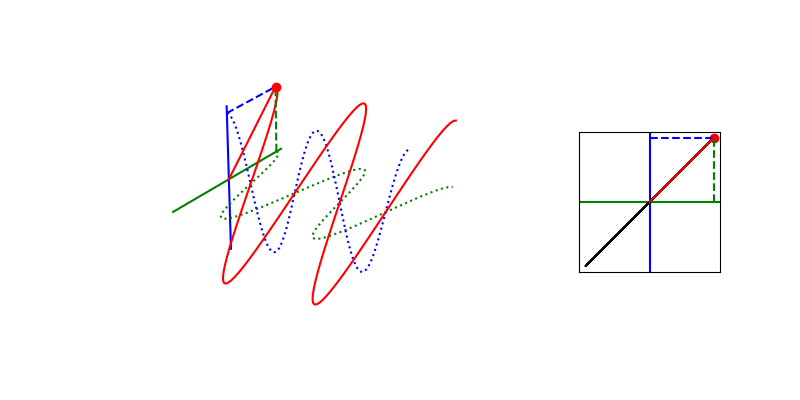

In [21]:
theta = np.radians(45)
v = mueller.stokes_linear(theta)
aplt = mueller.draw_field(v)
aplt.show()

<IPython.core.display.Javascript object>


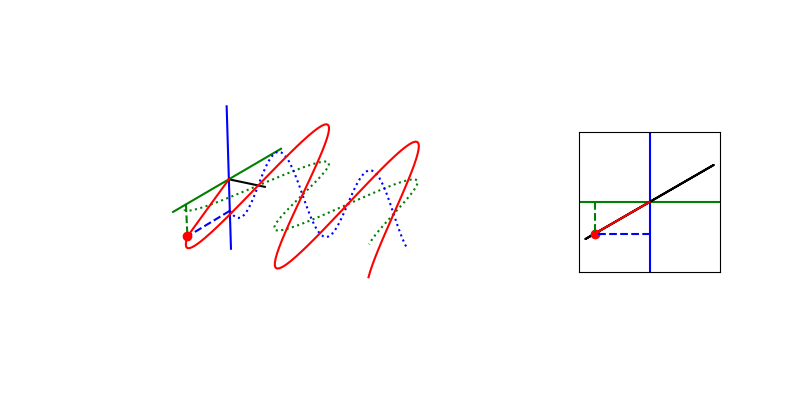

In [22]:
theta = np.radians(30)
v = jones.field_linear(theta)
jones.draw_field_animated(v)

<IPython.core.display.Javascript object>


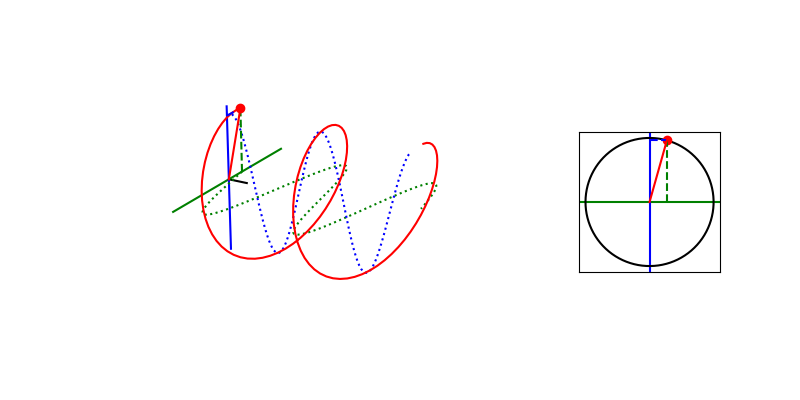

In [23]:
v = jones.field_left_circular()
jones.draw_field_animated(v)

<IPython.core.display.Javascript object>


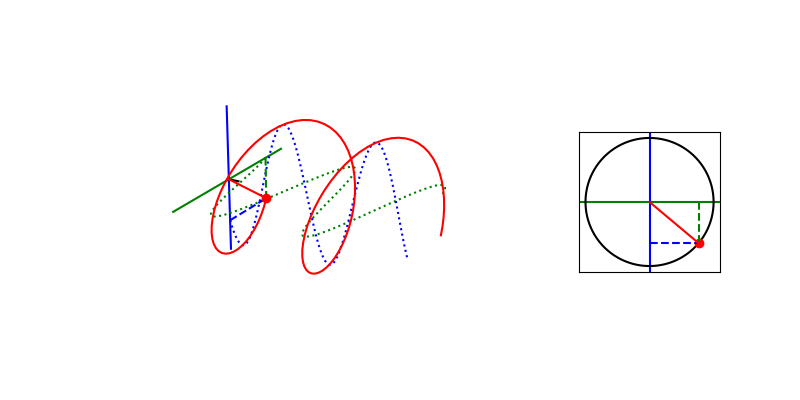

In [24]:
v=jones.field_right_circular()
jones.draw_field_animated(v)

# Field Interpretation

In [15]:
v=jones.field_horizontal()
jones.interpret(v)

'Linear polarization at 0.000000 degrees CCW from x-axis'

In [16]:
v=jones.field_vertical()
jones.interpret(v)

'Linear polarization at 90.000000 degrees CCW from x-axis'

In [17]:
theta = np.radians(45)
v=jones.field_linear(theta)
jones.interpret(v)

'Linear polarization at 45.000000 degrees CCW from x-axis'

In [18]:
v=np.array([3*np.exp(-1j*np.pi), 3*np.exp(-1j*np.pi/3)])
jones.interpret(v)

'Left circular polarization'

In [19]:
v=np.array([1,-1j])
jones.interpret(v)

'Right circular polarization'

# Optical isolator

In [26]:
A = mueller.stokes_linear(np.pi/4)
B = mueller.op_linear_polarizer(0)
C = mueller.op_quarter_wave_plate(np.pi/4)
D = mueller.op_linear_polarizer(np.pi/2)

In [27]:
D*C*B

array([[ 0.25, -0.  ,  0.  ,  0.  ],
       [-0.  ,  0.  , -0.  , -0.  ],
       [ 0.  , -0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , -0.  ,  0.  ]])

In [29]:
(D*C*B)@A

array([0.25, 0.  , 0.  , 0.  ])

In [32]:
A = mueller.stokes_linear(0)
B = mueller.op_linear_polarizer(np.pi/4)
C = mueller.op_quarter_wave_plate(0)
D = mueller.op_mirror()
E = mueller.op_quarter_wave_plate(0)
F = mueller.op_linear_polarizer(-np.pi/4)

In [33]:
(F*E*D*C*B)@A

array([0.25, 0.  , 0.  , 0.  ])